## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Etsy Top Sellers Data_Prepared v3.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'shop_id', 'shop_name', 'url', 'shop_create_date',
       'month_create', 'year_create', 'shop_update_date', 'sold_count',
       'additional_customization', 'active_listing_count', 'city', 'state',
       'country', 'headline', 'favorites_count', 'average_rating',
       'total_rating_count', 'average_rating_count', 'accepts_direct_checkout',
       'accepts_paypal', 'ships_to_country_ids', 'is_eligible_free_shipping',
       'has_min_free_shipping', 'has_free_shipping', 'ships_to_regions'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,shop_id,shop_name,url,shop_create_date,month_create,year_create,shop_update_date,sold_count,additional_customization,...,average_rating,total_rating_count,average_rating_count,accepts_direct_checkout,accepts_paypal,ships_to_country_ids,is_eligible_free_shipping,has_min_free_shipping,has_free_shipping,ships_to_regions
0,0,6923427,kawaiistickers4you,https://www.etsy.com/shop/kawaiistickers4you,5/18/2012,May,2012,1643091607,27723,False,...,1.0000,9628,1,False,True,"[193, 105, 99, 129, 215, 220, 128, 103, 165, 1...",True,True,True,NaN
1,1,5242648,JustForMeSewing,https://www.etsy.com/shop/JustForMeSewing,10/4/2010,October,2010,1632363895,39900,False,...,5.0000,5470,1,True,False,"[209, 0, 79, 123, 61, 220]",True,True,True,NaN
2,2,5593341,SwellAndGrand,https://www.etsy.com/shop/SwellAndGrand,10/4/2010,October,2010,1640184600,33696,False,...,5.0000,4595,1,True,False,"[0, 209]",True,True,True,NaN
3,3,6441254,PrettyThingsSupplies,https://www.etsy.com/shop/PrettyThingsSupplies,7/30/2011,July,2011,1647391292,29155,False,...,5.0000,7851,1,True,False,"[79, 105, 93, 103, 61, 123, 91, 209, 0, 193, 1...",True,True,True,NaN
4,4,6176258,KangarooCare,https://www.etsy.com/shop/KangarooCare,1/17/2011,January,2011,1647708638,25779,True,...,5.0000,3975,1,True,False,"[131, 191, 148, 189, 145, 165, 118, 100, 272, ...",True,True,True,NaN
5,5,7986540,thatchandthistleco,https://www.etsy.com/shop/thatchandthistleco,3/28/2013,March,2013,1632495085,27298,False,...,3.0000,5194,2,True,False,"[291, 164, 180, 89, 69, 0, 165, 167, 146, 112,...",True,False,True,['US']
6,6,7968194,MelindaWoodDesigns,https://www.etsy.com/shop/MelindaWoodDesigns,3/23/2013,March,2013,1648747603,47118,False,...,4.5000,3116,2,True,False,"[79, 209, 0]",False,False,False,['ANY']
7,7,7009013,Backtozero,https://www.etsy.com/shop/Backtozero,6/20/2012,June,2012,1647344360,45931,False,...,5.0000,8869,2,True,False,"[89, 79, 121, 62, 146, 172, 159, 61, 167, 105,...",True,True,True,NaN
8,8,15433347,GetItCreations,https://www.etsy.com/shop/GetItCreations,6/25/2017,June,2017,1648376639,27641,False,...,5.0000,3213,2,True,False,"[220, 219, 61, 105, 204, 164, 131, 91, 172, 0,...",True,True,True,NaN
9,9,14302048,TickledPinkPlanning,https://www.etsy.com/shop/TickledPinkPlanning,12/28/2016,December,2016,1579425889,27086,False,...,5.0000,6978,2,True,False,"[103, 220, 177, 165, 74, 167, 172, 142, 181, 6...",True,True,True,NaN


In [7]:
df.shape

(10000, 26)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# Some missing values in location and headline but won't be using for this exercise

Unnamed: 0                      0
shop_id                         0
shop_name                       0
url                             0
shop_create_date                0
month_create                    0
year_create                     0
shop_update_date                0
sold_count                      0
additional_customization        0
active_listing_count            0
city                         1821
state                        3556
country                         4
headline                      494
favorites_count                 0
average_rating                  0
total_rating_count              0
average_rating_count            0
accepts_direct_checkout         0
accepts_paypal                  0
ships_to_country_ids            0
is_eligible_free_shipping       0
has_min_free_shipping           0
has_free_shipping               0
ships_to_regions             1446
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(10000,)

##### Extreme values checks

C:\Users\rstev\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sold_count', ylabel='Density'>

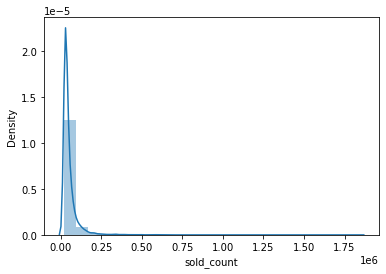

In [15]:
sns.distplot(df['sold_count'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.
# The max is much much higher than the mean.

In [16]:
df['sold_count'].mean() # Check the mean

53484.1924

In [17]:
df['sold_count'].median() # Check the median

36750.0

In [18]:
df['sold_count'].max() # Check the max

1839198

C:\Users\rstev\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='favorites_count', ylabel='Density'>

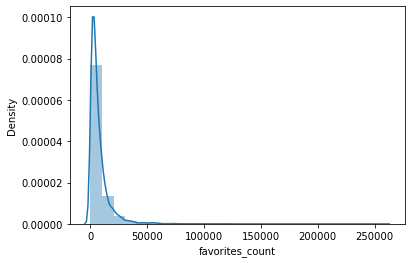

In [21]:
sns.distplot(df['favorites_count'], bins=25) # Shows extreme values

C:\Users\rstev\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rating_count', ylabel='Density'>

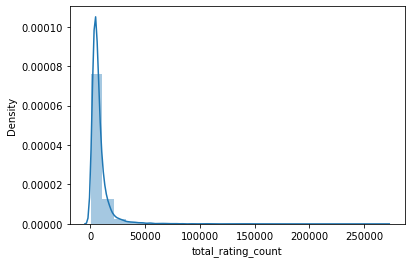

In [22]:
sns.distplot(df['total_rating_count'], bins=25) # Shows extreme values

### 3. Data prep for regression analysis 

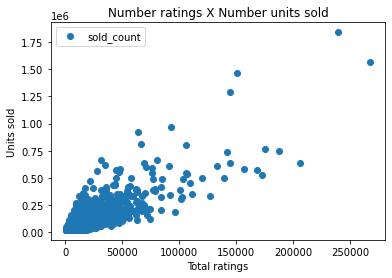

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'total_rating_count', y='sold_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number ratings X Number units sold')  
plt.xlabel('Total ratings')  
plt.ylabel('Units sold')  
plt.show()

### 6.4 Answer #5. Hypothesis: The more ratings an Etsy shop has, the more units they sell.

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['total_rating_count'].values.reshape(-1,1)
y = df['sold_count'].values.reshape(-1,1)

In [26]:
X

array([[ 9628],
       [ 5470],
       [ 4595],
       ...,
       [14206],
       [ 4748],
       [ 7920]], dtype=int64)

In [27]:
y

array([[27723],
       [39900],
       [33696],
       ...,
       [29698],
       [28208],
       [24444]], dtype=int64)

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

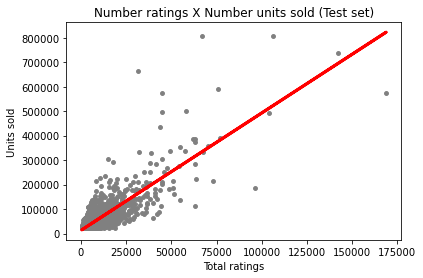

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number ratings X Number units sold (Test set)')
plot_test.xlabel('Total ratings')
plot_test.ylabel('Units sold')
plot_test.show()

### 6.4 Answer #10. The regression line does not look like a great fit because there are a number of points quite far from the line. This might be caused by the extreme values shown earlier. It's also likely that other factors play a part here - such as average rating. If a shop has a ton of ratings, but they are all low, that probably doesn't fit the hypothesis.

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.79937753]]
Mean squared error:  928325346.2476472
R2 score:  0.6573844528611568


In [35]:
y_predicted

array([[ 99165.82754333],
       [ 24285.93933797],
       [ 71598.20301753],
       ...,
       [168574.42536578],
       [128178.06470532],
       [ 42216.41378581]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,101328,99165.827543
1,42176,24285.939338
2,84322,71598.203018
3,38485,44078.572267
4,31688,37757.792061
5,125706,93953.703547
6,38102,25519.379363
7,33028,33111.994614
8,28112,24295.538093
9,39401,39087.219637


### 6.4 Answer #13. Though the R2 score is pretty good at .657, the mean squared error is very large and the predicted y values are quite far off from the actual scores. It might be worthwhile to run this model with outliers excluded, but will compare how the regression fits the training set first. I think there are other factors that need to be considered and total number of ratings cannot be the sole predictor of units sold.

##### Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.79937753]]
Mean squared error:  1288418866.6505811
R2 score:  0.7043116677748347


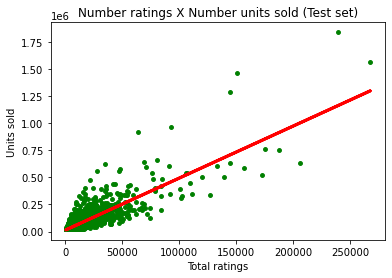

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number ratings X Number units sold (Test set)')
plot_test.xlabel('Total ratings')
plot_test.ylabel('Units sold')
plot_test.show()

### Performance improvement after removing outliers

In [41]:
# Clean the extreme values from the "sold_count" variable observed during the consistency checks.

df_test = df[df['sold_count'] <=185000] 

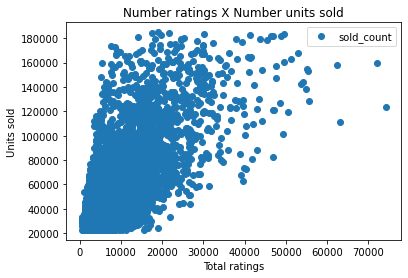

In [42]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'total_rating_count', y='sold_count',style='o') 
plt.title('Number ratings X Number units sold')  
plt.xlabel('Total ratings')  
plt.ylabel('Units sold')  
plt.show()

In [43]:
# Reshape again.

X_2 = df_test['total_rating_count'].values.reshape(-1,1)
y_2 = df_test['sold_count'].values.reshape(-1,1)

In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [45]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [46]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [47]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.29080339]]
Mean squared error:  360021634.3117875
R2 score:  0.5207427892579906


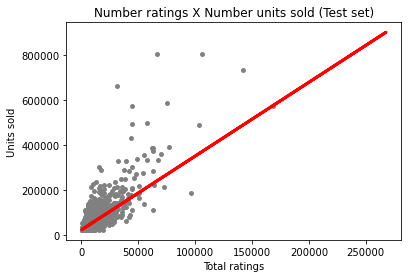

In [49]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Number ratings X Number units sold (Test set)')
plot_test.xlabel('Total ratings')
plot_test.ylabel('Units sold')
plot_test.show()